
# Airports and Airport Coordinates
### lists of airports for plotting on map

In [1]:
import re
import pandas as pd
import numpy as np
from pygeocoder import Geocoder
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
%matplotlib inline

In [2]:
import emoji

In [3]:
worst_airports = ['ORD', 'ATL', 'LAX', 'DFW', 'CLT', 'LAS', 'IAH', 'SFO', 'PHX']

In [4]:
# set the map range of coordinates to display mUSA
mUSA = Basemap(projection='mill', llcrnrlat = 22.5, llcrnrlon = -128,
               urcrnrlat = 52.0, urcrnrlon = -67, resolution='l')

In [5]:
# all the stuff that runs through get_airport_code()
codes_gotten = []

In [6]:
def get_airport_code(airport_name):
    """function takes in a loosely typed name of city and or airport and 
    returns the airports' three digit code, full name, and coordinates
    It's good to specify the airport if a city has two, such as Dallas Love Field
    and Dallas Fort Worth """
    g = Geocoder.geocode(airport_name)
    proto_code = g.formatted_address.encode('utf-8')    
#     airport_code = re.search('\(([^)]+)', proto_code).group(1)
#     x_map_coords, y_map_coords = mUSA(g.coordinates[0], g.coordinates[1])
    x_map_coords, y_map_coords = mUSA(g.coordinates[1], g.coordinates[0])
    codes_gotten.append((str(airport_name), (x_map_coords, y_map_coords)))
    return str(g.airport), g.coordinates, str(airport_name), (x_map_coords, y_map_coords)
    

In [7]:
codes_gotten = []
for xxxxx in worst_airports:
    get_airport_code(xxxxx)
codes_gotten_dict = dict(codes_gotten)

In [11]:
codes_gotten_dict

{'ATL': (4845016.409674927, 1342252.968623687),
 'CLT': (5232017.437809654, 1539608.9499379043),
 'DFW': (3442556.035331869, 1250100.3674997683),
 'IAH': (3631982.3414067235, 892632.3678245954),
 'LAS': (1428438.388042691, 1649658.5204071011),
 'LAX': (1066522.300855291, 1379810.5044003548),
 'ORD': (4458100.356663127, 2415925.8138660314),
 'PHX': (1778251.9917544825, 1316899.771714727),
 'SFO': (625031.3476455866, 1846034.0456910953)}

In [12]:
codes_gotten

[('ORD', (4458100.356663127, 2415925.8138660314)),
 ('ATL', (4845016.409674927, 1342252.968623687)),
 ('LAX', (1066522.300855291, 1379810.5044003548)),
 ('DFW', (3442556.035331869, 1250100.3674997683)),
 ('CLT', (5232017.437809654, 1539608.9499379043)),
 ('LAS', (1428438.388042691, 1649658.5204071011)),
 ('IAH', (3631982.3414067235, 892632.3678245954)),
 ('SFO', (625031.3476455866, 1846034.0456910953)),
 ('PHX', (1778251.9917544825, 1316899.771714727))]

In [13]:
plt.rcParams["figure.figsize"] = [22, 10]

/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


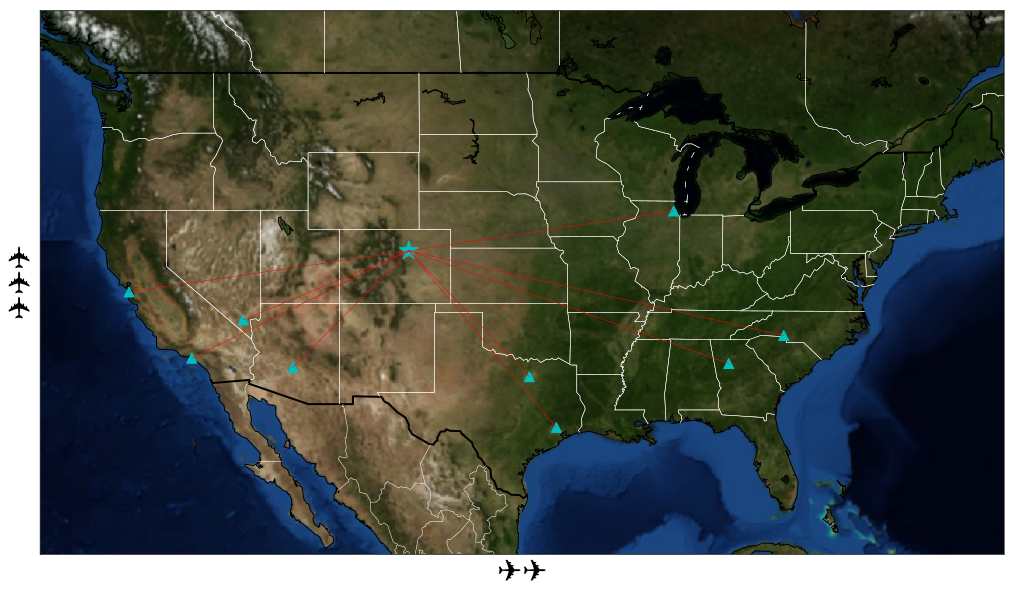

In [14]:
# mark DENVER (origin) with a cyan star
mUSA.plot(2593760.815099486, 2135931.09593892, 'c*', markersize=20)
# loop through worst_airport_codes for destination markers
for i, xs in codes_gotten:
    mUSA.plot(codes_gotten_dict[i][0], codes_gotten_dict[i][1], 'c^', markersize=10)
# loop through destination codes and origin codes, combine them and draw
# lines between origin and destination
for i2, xs2 in codes_gotten:
    mUSA.plot( [2593760.815099486, codes_gotten_dict[i2][0]], 
               [2135931.09593892, codes_gotten_dict[i2][1]], 
               color='r', linewidth=.5, label='flight' )
    
# Draw the macro details
mUSA.drawcoastlines()
mUSA.drawcountries(linewidth=2)
mUSA.drawstates(color='w')
mUSA.bluemarble(scale=0.75)
plt.xlabel((emoji.emojize(':airplane:'*2)), size=30)
plt.ylabel((emoji.emojize(':airplane:'*3)), size=30)
plt.show()

In [15]:
%store -r airports_data

In [24]:
airports_data.head(13)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


Create a column of map coordinates that uses get_airport_code() 

In [17]:
# all the stuff that runs through get_airport_code()
codes_gotten_airports = []

In [21]:
code_list = list(airports_data.IATA_CODE)

In [22]:
type(code_list)

list

In [29]:
codes_gotten = []
for xxxxx in code_list:
    get_airport_code(xxxxx)
codes_gotten_dict = dict(codes_gotten)

GeocoderError: Error OVER_QUERY_LIMIT
Query: https://maps.google.com/maps/api/geocode/json?region=&sensor=false&bounds=&language=&address=AEX

In [25]:
codes_gotten_airports_dict

NameError: name 'codes_gotten_airports_dict' is not defined

In [26]:
codes_gotten_airports

[]